# Group Project Team # 

# Data Exploration    

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


file_path = 'bank.csv' 
bank_df = pd.read_csv(file_path)

In [2]:
# Display the first few rows of the dataset
print("\nFirst 5 rows of the dataset:\n")
bank_df.head()


First 5 rows of the dataset:



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
# Summary statistics
print("\nSummary Statistics:\n")
print(bank_df.describe(include='all'))


Summary Statistics:

                 age         job  marital  education default       balance  \
count   11162.000000       11162    11162      11162   11162  11162.000000   
unique           NaN          12        3          4       2           NaN   
top              NaN  management  married  secondary      no           NaN   
freq             NaN        2566     6351       5476   10994           NaN   
mean       41.231948         NaN      NaN        NaN     NaN   1528.538524   
std        11.913369         NaN      NaN        NaN     NaN   3225.413326   
min        18.000000         NaN      NaN        NaN     NaN  -6847.000000   
25%        32.000000         NaN      NaN        NaN     NaN    122.000000   
50%        39.000000         NaN      NaN        NaN     NaN    550.000000   
75%        49.000000         NaN      NaN        NaN     NaN   1708.000000   
max        95.000000         NaN      NaN        NaN     NaN  81204.000000   

       housing   loan   contact          

In [4]:
# Display basic information about the dataset
print("Dataset Information:\n")
bank_df.info()

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
# Check for missing values
print("\nMissing Values:\n")
print(bank_df.isnull().sum())


Missing Values:

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [6]:
# Categorical variables overview
categorical_columns = bank_df.select_dtypes(include=['object']).columns
print("\nCategorical Variables Distribution:")
for column in categorical_columns:
    print(f"\n{column} Value Counts:")
    print(bank_df[column].value_counts())


Categorical Variables Distribution:

job Value Counts:
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

marital Value Counts:
married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

education Value Counts:
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

default Value Counts:
no     10994
yes      168
Name: default, dtype: int64

housing Value Counts:
no     5881
yes    5281
Name: housing, dtype: int64

loan Value Counts:
no     9702
yes    1460
Name: loan, dtype: int64

contact Value Counts:
cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

month Value Counts:
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     

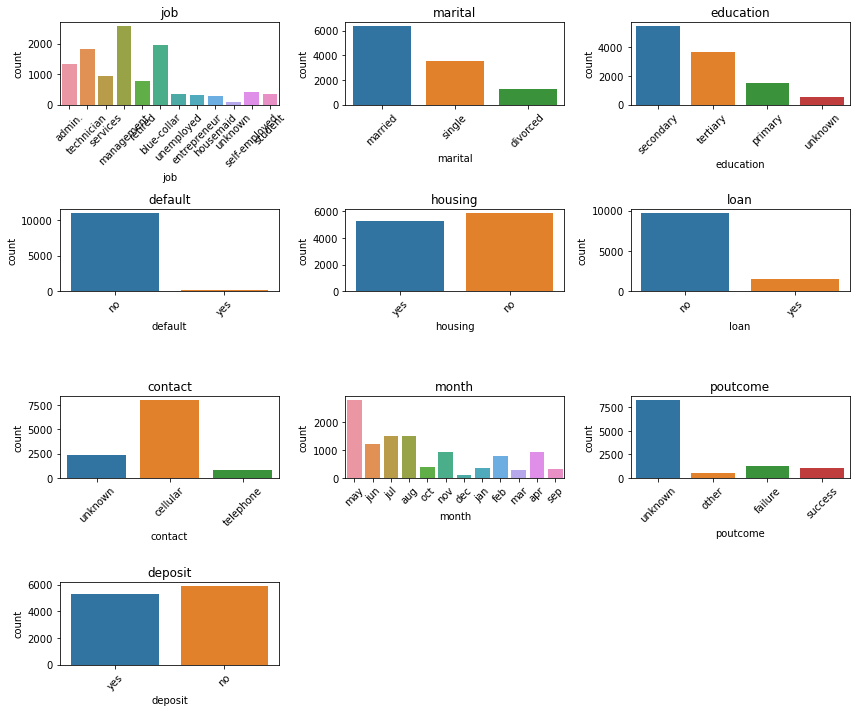

In [7]:
# Visualize distributions of categorical variables
plt.figure(figsize=(12, 10))
for i, column in enumerate(categorical_columns):
    plt.subplot(4, 3, i+1)
    sns.countplot(data=bank_df, x=column)
    plt.title(column)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

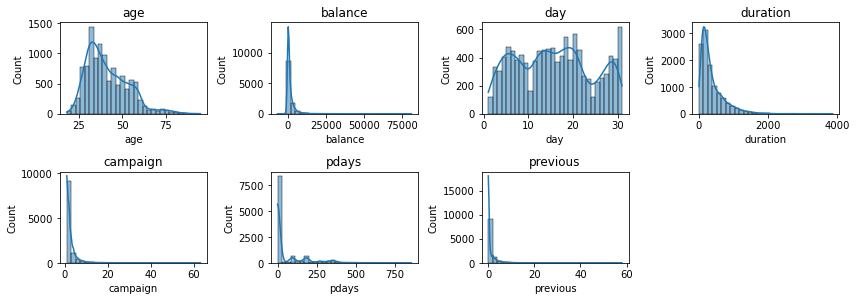

In [8]:
# Visualize distributions of continuous variables
continuous_columns = bank_df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 8))
for i, column in enumerate(continuous_columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(bank_df[column], bins=30, kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

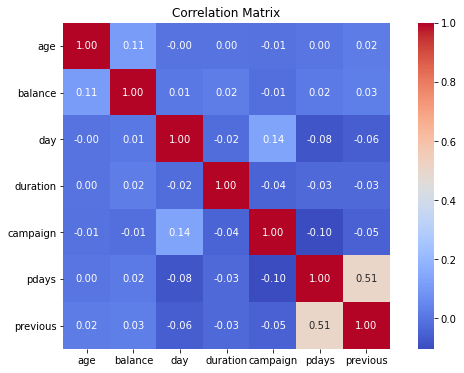

In [9]:
# Correlation matrix for continuous variables
plt.figure(figsize=(10, 6))
correlation_matrix = bank_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


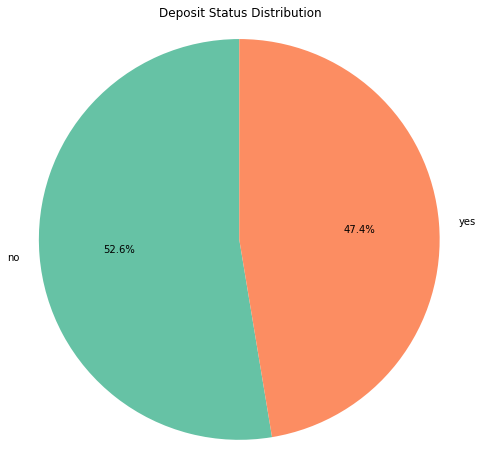

In [10]:
# Analyze target variable distribution
plt.figure(figsize=(8, 8))
deposit_counts = bank_df['deposit'].value_counts()
plt.pie(deposit_counts, labels=deposit_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66c2a5','#fc8d62'])
plt.title('Deposit Status Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle.
plt.show()


In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for outlier detection
numeric_cols = bank_df.select_dtypes(include=[np.number]).columns

# Outlier detection and counting using IQR
def count_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_count = outliers.shape[0]
    outlier_percentage = (outlier_count / data.shape[0]) * 100
    return outlier_count, outlier_percentage

# Counting outliers and their percentage for each numeric column using IQR
print("Outlier count and percentage by IQR method:")
outlier_info = {}
for col in numeric_cols:
    count, percentage = count_outliers_iqr(bank_df, col)
    outlier_info[col] = {"count": count, "percentage": percentage}
    print(f"{col}: {count} outliers ({percentage:.2f}%)")





Outlier count and percentage by IQR method:
age: 171 outliers (1.53%)
balance: 1055 outliers (9.45%)
day: 0 outliers (0.00%)
duration: 636 outliers (5.70%)
campaign: 601 outliers (5.38%)
pdays: 2750 outliers (24.64%)
previous: 1258 outliers (11.27%)


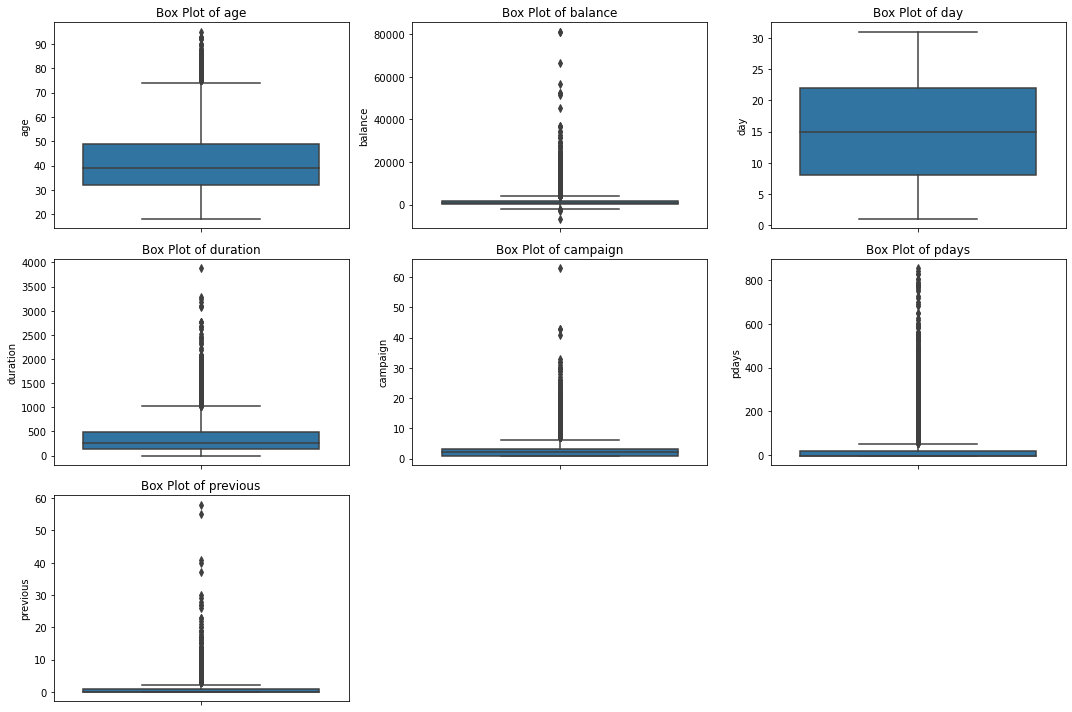

In [12]:
# Visualization of outliers with box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y = bank_df[col])
    plt.title(f"Box Plot of {col}")
plt.tight_layout()
plt.show()


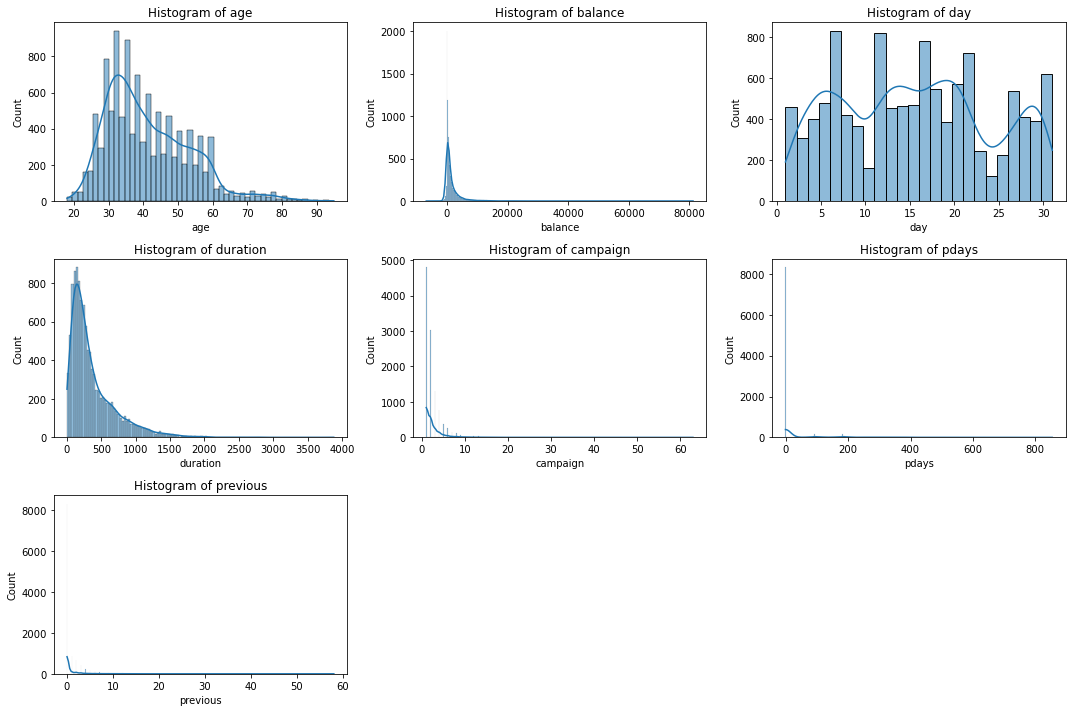

In [13]:

# Visualization of outliers with histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(bank_df[col], kde=True)
    plt.title(f"Histogram of {col}")
plt.tight_layout()
plt.show()

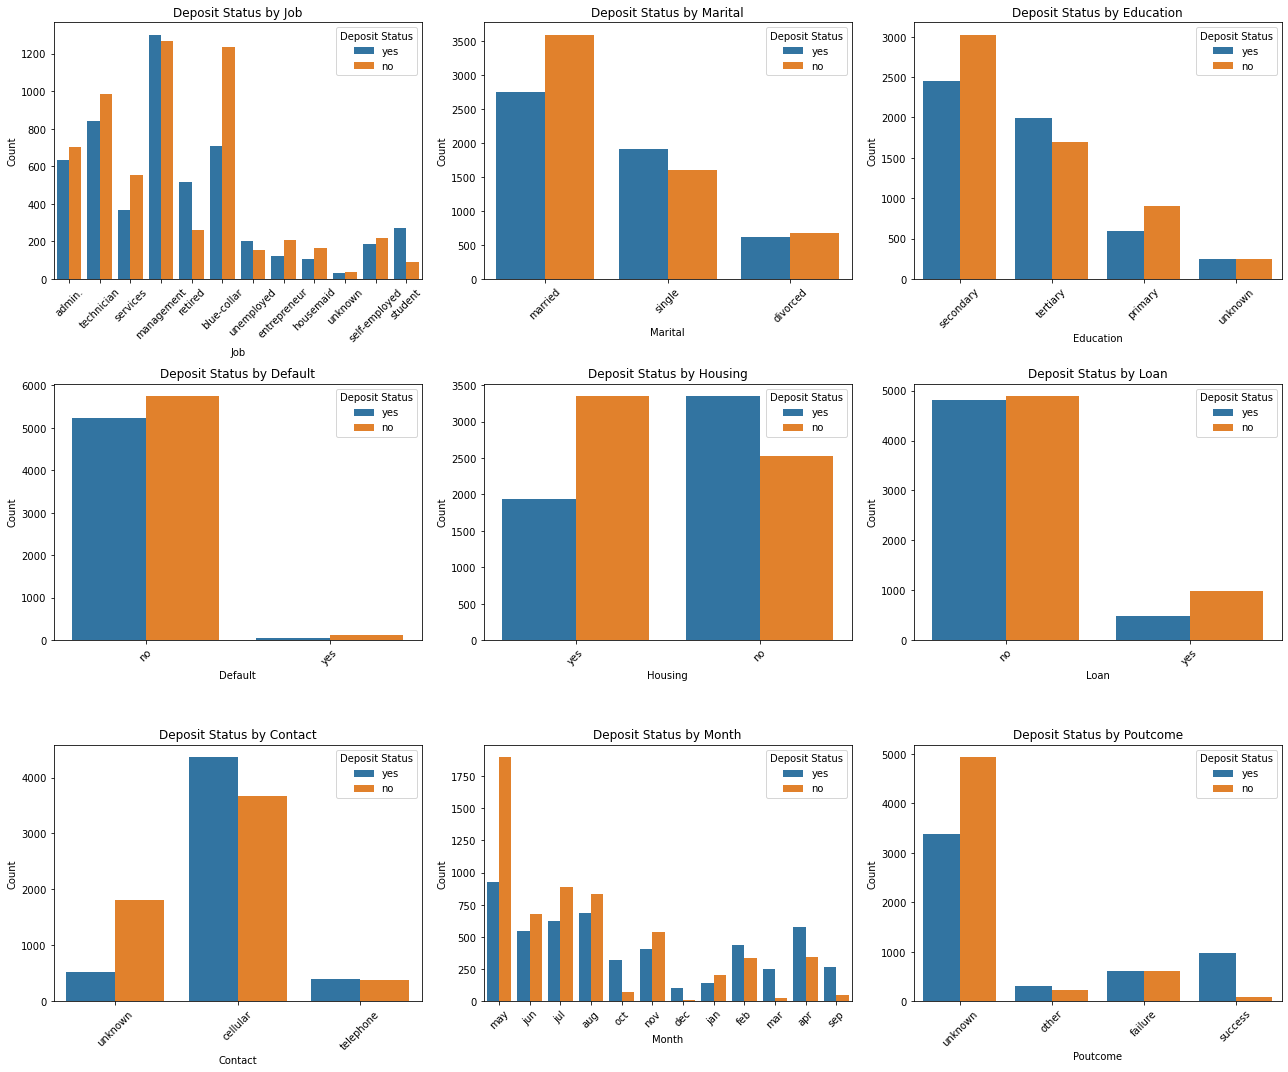

In [14]:
# List of categorical variables to visualize
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Plotting count plots for each categorical variable by deposit status
plt.figure(figsize=(18, 15))
for i, column in enumerate(categorical_columns):
    plt.subplot(3, 3, i+1)  # Adjust grid size based on the number of categorical columns
    sns.countplot(data=bank_df, x=column, hue='deposit')
    plt.title(f'Deposit Status by {column.capitalize()}')
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Deposit Status')
plt.tight_layout()
plt.show()


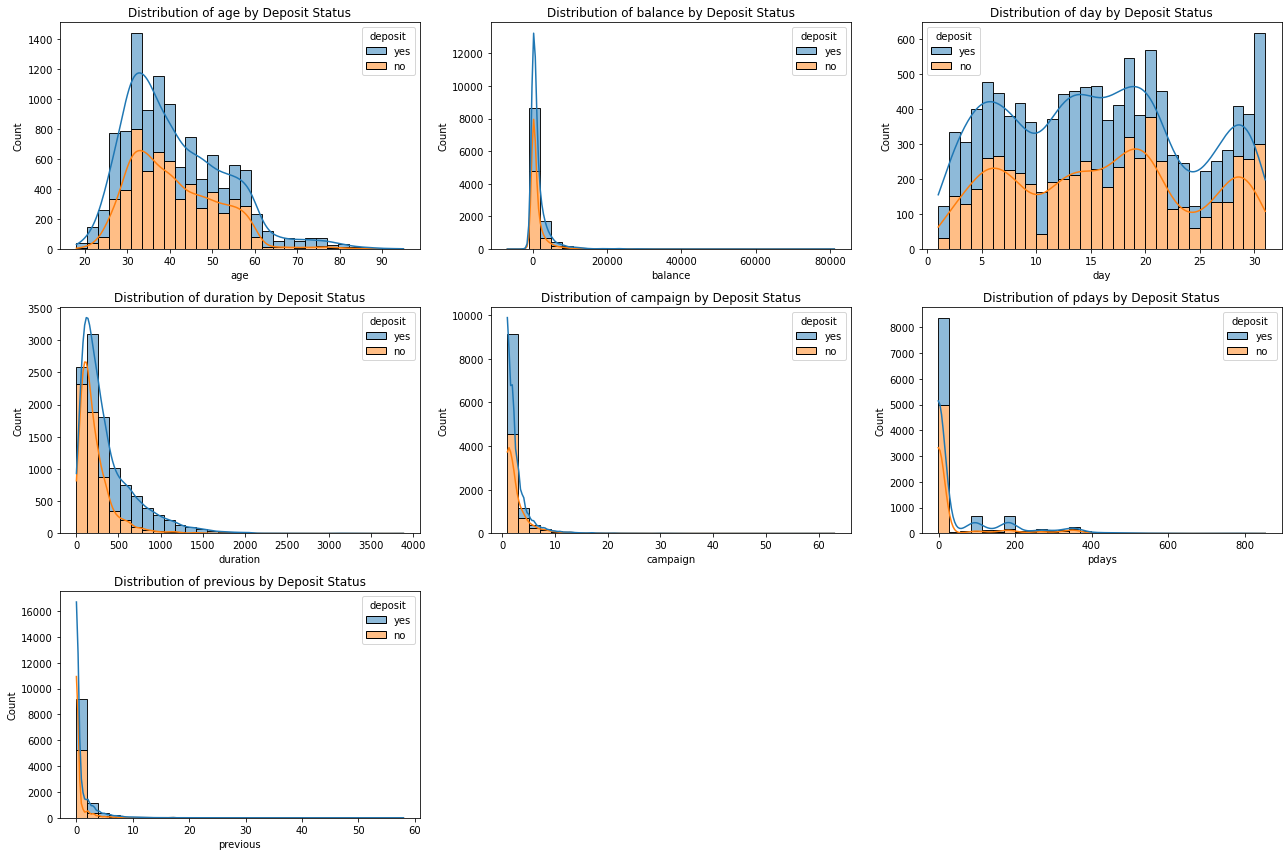

In [15]:
# List of continuous variables to visualize
continuous_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Set up the figure for multiple plots
plt.figure(figsize=(18, 12))

# Loop through each continuous variable to create individual histograms
for i, column in enumerate(continuous_columns):
    plt.subplot(3, 3, i + 1)  # Arrange plots in a 3x3 grid
    sns.histplot(data=bank_df, x=column, hue='deposit', kde=True, multiple="stack", bins=30)
    plt.title(f'Distribution of {column} by Deposit Status')
    plt.xlabel(column)
    plt.ylabel('Count')

# Adjust layout for readability
plt.tight_layout()
plt.show()

# Pre Processing

Categorial variables encoding to 1 and 0 

In [16]:
#Changing binary variables to numbers
bank_df["default"] = bank_df["default"].map({'no': 0, 'yes': 1})
bank_df["default"].unique()

array([0, 1])

In [17]:
#Changing binary variables to numbers
bank_df["housing"] = bank_df["housing"].map({'yes': 1, 'no': 0})
bank_df["housing"].unique()

array([1, 0])

In [18]:
#Changing binary variables to numbers
bank_df["loan"] = bank_df["loan"].map({'no': 0, 'yes': 1})
bank_df["loan"].unique()

array([0, 1])

In [19]:
#Changing binary variables to numbers
bank_df["deposit"] = bank_df["deposit"].map({'yes': 1, 'no': 0})
bank_df["deposit"].unique()

array([1, 0])

In [20]:
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,0,1,1,0,cellular,20,apr,257,1,-1,0,unknown,0
11158,39,services,married,secondary,0,733,0,0,unknown,16,jun,83,4,-1,0,unknown,0
11159,32,technician,single,secondary,0,29,0,0,cellular,19,aug,156,2,-1,0,unknown,0
11160,43,technician,married,secondary,0,0,0,1,cellular,8,may,9,2,172,5,failure,0


In [21]:
# Mapping for months to their corresponding numbers
month_mapping = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

# Replace month names with their corresponding numbers
bank_df['month'] = bank_df['month'].replace(month_mapping)

# Display the updated DataFrame
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,5,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,5,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,5,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,5,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,5,673,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,0,1,1,0,cellular,20,4,257,1,-1,0,unknown,0
11158,39,services,married,secondary,0,733,0,0,unknown,16,6,83,4,-1,0,unknown,0
11159,32,technician,single,secondary,0,29,0,0,cellular,19,8,156,2,-1,0,unknown,0
11160,43,technician,married,secondary,0,0,0,1,cellular,8,5,9,2,172,5,failure,0


In [22]:
# One-hot encoding without dropping any categories
bank_df_encoded = pd.get_dummies(bank_df, columns=[
    'job', 'education', 'contact', 'poutcome', 'marital'
], drop_first=False)





In [23]:
import pandas as pd

# Set options to display all columns
pd.set_option('display.max_columns', None)

# Now calling df.head() or df.tail() will display all columns without truncation
bank_df_encoded.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,marital_divorced,marital_married,marital_single
0,59,0,2343,1,0,5,5,1042,1,-1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
1,56,0,45,0,0,5,5,1467,1,-1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
2,41,0,1270,1,0,5,5,1389,1,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
3,55,0,2476,1,0,5,5,579,1,-1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
4,54,0,184,0,0,5,5,673,2,-1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0


In [24]:

continuous_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous','month']


# Dictionary to store bin ranges and labels for each continuous variable
bin_ranges = {}

# Binning each continuous variable into 4 bins and creating labels
for col in continuous_columns:
    # Create bins with labels indicating the range
    bank_df_encoded[col], bins = pd.cut(bank_df_encoded[col], bins=4, labels=False, retbins=True)
    
    # Create human-readable labels for the bins, like "30-50"
    labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins) - 1)]
    
    # Map each bin label to its corresponding range and store in the dictionary
    bin_ranges[col] = {f"Bin {i}": labels[i] for i in range(len(labels))}

# Display bin ranges for reference
print("Bin ranges for each variable:")
for var, ranges in bin_ranges.items():
    print(f"{var}: {ranges}")

# Show the binned DataFrame
bank_df_encoded.head()

Bin ranges for each variable:
age: {'Bin 0': '17-37', 'Bin 1': '37-56', 'Bin 2': '56-75', 'Bin 3': '75-95'}
balance: {'Bin 0': '-6935-15165', 'Bin 1': '15165-37178', 'Bin 2': '37178-59191', 'Bin 3': '59191-81204'}
day: {'Bin 0': '0-8', 'Bin 1': '8-16', 'Bin 2': '16-23', 'Bin 3': '23-31'}
duration: {'Bin 0': '-1-971', 'Bin 1': '971-1941', 'Bin 2': '1941-2911', 'Bin 3': '2911-3881'}
campaign: {'Bin 0': '0-16', 'Bin 1': '16-32', 'Bin 2': '32-47', 'Bin 3': '47-63'}
pdays: {'Bin 0': '-1-212', 'Bin 1': '212-426', 'Bin 2': '426-640', 'Bin 3': '640-854'}
previous: {'Bin 0': '0-14', 'Bin 1': '14-29', 'Bin 2': '29-43', 'Bin 3': '43-58'}
month: {'Bin 0': '0-3', 'Bin 1': '3-6', 'Bin 2': '6-9', 'Bin 3': '9-12'}


,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,marital_divorced,marital_married,marital_single
0,2,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
1,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
2,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
3,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
4,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0


In [25]:
bank_df_encoded

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,marital_divorced,marital_married,marital_single
0,2,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
1,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
2,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
3,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
4,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,0,0,0,1,0,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1
11158,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
11159,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
11160,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


# Model Selection and Training

Split the data set 

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target variable
X = bank_df_encoded.drop('deposit', axis=1)  # Features
y = bank_df_encoded['deposit']               # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the continuous columns to standardize
continuous_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'month']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test sets
X_train[continuous_columns] = scaler.fit_transform(X_train[continuous_columns])
X_test[continuous_columns] = scaler.transform(X_test[continuous_columns])

X_train

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,marital_divorced,marital_married,marital_single
3955,-0.937502,0,-0.078326,0,0,-0.376098,0.644560,3.361089,-0.076496,-0.286472,-0.054107,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1
11150,-0.937502,0,-0.078326,0,0,0.546225,0.644560,-0.259949,-0.076496,-0.286472,-0.054107,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
5173,0.462791,0,-0.078326,0,0,-0.376098,1.794236,-0.259949,-0.076496,-0.286472,-0.054107,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
3017,0.462791,0,-0.078326,0,0,-0.376098,1.794236,-0.259949,-0.076496,-0.286472,-0.054107,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0
2910,0.462791,0,-0.078326,0,0,-0.376098,1.794236,-0.259949,-0.076496,-0.286472,-0.054107,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.462791,0,-0.078326,1,0,-0.376098,0.644560,-0.259949,-0.076496,-0.286472,-0.054107,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0
5191,-0.937502,0,-0.078326,0,0,-0.376098,1.794236,-0.259949,-0.076496,-0.286472,-0.054107,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
5390,-0.937502,0,-0.078326,0,0,0.546225,0.644560,-0.259949,-0.076496,-0.286472,-0.054107,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
860,0.462791,0,-0.078326,0,0,1.468549,0.644560,-0.259949,-0.076496,-0.286472,-0.054107,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0


Modeling with Decision Trees

In [27]:

# Create a Decision Tree classifier with a maximum depth of 6
dt_classifier = DecisionTreeClassifier(max_depth=6, random_state=42)

# Fit the model
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.5f}')

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.72503
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.86      0.77      1166
           1       0.79      0.57      0.67      1067

    accuracy                           0.73      2233
   macro avg       0.74      0.72      0.72      2233
weighted avg       0.74      0.73      0.72      2233

Confusion Matrix:
[[1008  158]
 [ 456  611]]


Logistic regression: 

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(max_iter=10000, random_state=42)
lr_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_lr = lr_model.predict(X_test)  # Predict using X_test instead of X_train

print("Logistic Regression Model:")
print(classification_report(y_test, y_pred_lr))

accuracy = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {accuracy:.5f}')


Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.71      0.83      0.77      1166
           1       0.77      0.63      0.70      1067

    accuracy                           0.73      2233
   macro avg       0.74      0.73      0.73      2233
weighted avg       0.74      0.73      0.73      2233

Accuracy: 0.73489


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score





In [30]:
# Decision Tree Feature Importances
tree_importance = dt_classifier.feature_importances_
decision_tree_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Tree_Importance': tree_importance
})


# Filtering the DataFrame to keep only rows with Tree_Importance >= 0.01 or Tree_Importance <= -0.01
filtered_df = decision_tree_importance_df[
    (decision_tree_importance_df['Tree_Importance'] >= 0.01) | 
    (decision_tree_importance_df['Tree_Importance'] <= -0.01)]

# Sorting the filtered DataFrame by the 'Tree_Importance' column in ascending order
sorted_filtered_df = filtered_df.sort_values(by='Tree_Importance', ascending=False)

print(sorted_filtered_df)


             Feature  Tree_Importance
32  poutcome_success         0.300868
7           duration         0.226280
29   contact_unknown         0.184706
6              month         0.095999
3            housing         0.081660
33  poutcome_unknown         0.061858
9              pdays         0.017340
36    marital_single         0.011388


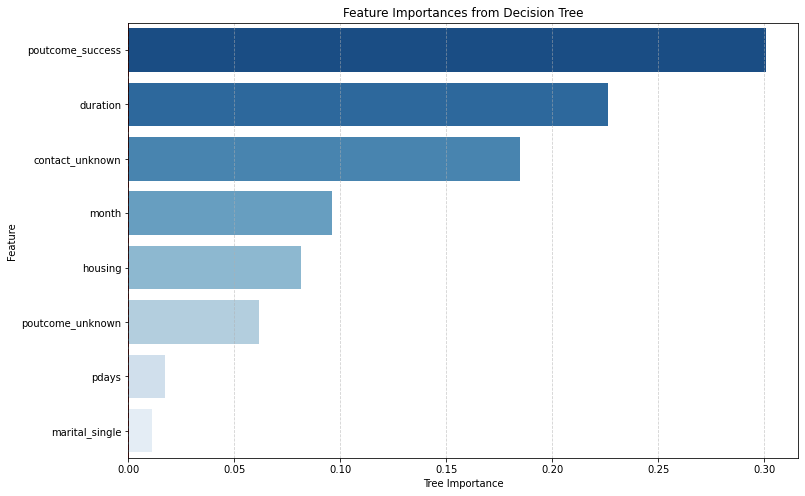

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Plotting the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Tree_Importance', 
    y='Feature', 
    data=sorted_filtered_df, 
    palette='Blues_r'
)
plt.axvline(0, color='red', linestyle='--')  # Reference line at zero
plt.title('Feature Importances from Decision Tree')
plt.xlabel('Tree Importance')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


In [32]:

#Logistic Regression Coefficients
logistic_coefs = lr_model.coef_[0]
logistic_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Logistic_Coefficient': logistic_coefs
})
    
filtered_logistic_df = logistic_importance_df[
    (logistic_importance_df['Logistic_Coefficient'] >= 0.4) | 
    (logistic_importance_df['Logistic_Coefficient'] <= -0.4)]




# Sorting the filtered DataFrame by the 'Logistic_Importance' column in ascending order
sorted_filtered_logistic_df = filtered_logistic_df.sort_values(by='Logistic_Coefficient', ascending=False)

# Printing the sorted filtered DataFrame
print(sorted_filtered_logistic_df)

             Feature  Logistic_Coefficient
32  poutcome_success              1.634257
7           duration              0.785321
16       job_retired              0.594387
19       job_student              0.511060
27  contact_cellular              0.474746
30  poutcome_failure             -0.483633
3            housing             -0.541081
4               loan             -0.547234
29   contact_unknown             -0.676386
33  poutcome_unknown             -0.789053


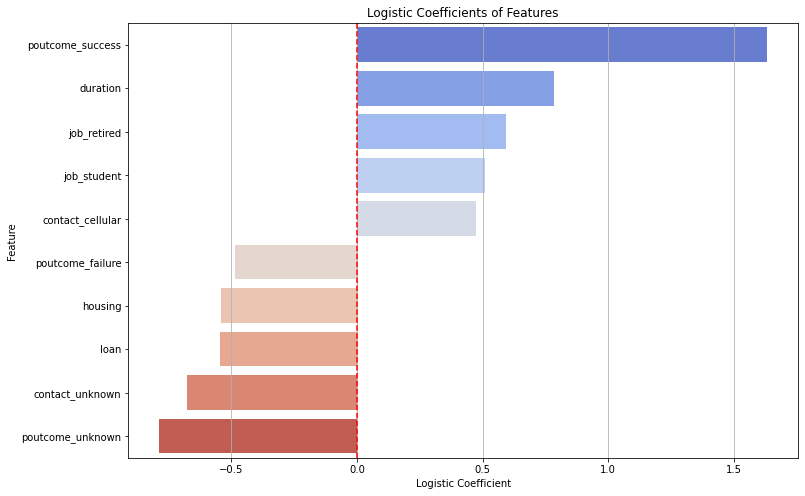

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Create DataFrame
logistic_df = pd.DataFrame(sorted_filtered_logistic_df)

# Categorizing features into positive and negative coefficients
logistic_df['Impact'] = logistic_df['Logistic_Coefficient'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

# Visualizing the coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Logistic_Coefficient', y='Feature', data=logistic_df, palette='coolwarm')
plt.axvline(0, color='red', linestyle='--')
plt.title('Logistic Coefficients of Features')
plt.xlabel('Logistic Coefficient')
plt.ylabel('Feature')
plt.grid(axis='x')
plt.show()

K-means with just logistic regression:
We chose to use two clusters from this model for our campaign
    

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Assume sorted_filtered_logistic_df is already defined
# Extract features from sorted_filtered_logistic_df
logistic_features = sorted_filtered_logistic_df['Feature'].tolist()

# Include 'deposit' for the target variable, ensure it's in the DataFrame
if 'deposit' not in logistic_features:
    logistic_features.append('deposit')

# Create a copy of the DataFrame to avoid SettingWithCopyWarning
logistic_coefficient_df = bank_df_encoded[logistic_features].copy()

# Apply K-Means clustering with 4 clusters
kmeans_logistic = KMeans(n_clusters=4, random_state=42)
logistic_clusters = kmeans_logistic.fit_predict(logistic_coefficient_df.drop(columns='deposit'))

# Add cluster labels to the DataFrame using .loc to avoid SettingWithCopyWarning
logistic_coefficient_df.loc[:, 'cluster'] = logistic_clusters

# Calculate the probability of "yes" for each cluster
logistic_cluster_summary = logistic_coefficient_df.groupby('cluster').agg({
    'deposit': ['mean', 'count'],
    **{col: 'mean' for col in logistic_features if col != 'deposit'}
}).reset_index()

# Rename columns for clarity
logistic_cluster_summary.columns = ['Cluster', 'Mean Deposit Probability', 'Count'] + \
                                   [f'Mean {col}' for col in logistic_features if col != 'deposit']

# Sort by the mean deposit probability
sorted_logistic_cluster_summary = logistic_cluster_summary.sort_values(by='Mean Deposit Probability', ascending=False)

sorted_logistic_cluster_summary


/Users/idoshkuri/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Cluster,Mean Deposit Probability,Count,Mean poutcome_success,Mean duration,Mean job_retired,Mean job_student,Mean contact_cellular,Mean poutcome_failure,Mean housing,Mean loan,Mean contact_unknown,Mean poutcome_unknown
1,1,0.671282,2817,0.378062,0.040469,0.086617,0.050763,0.925453,0.433795,0.451189,0.095492,0,0.000000
2,2,0.529364,3678,0.000000,0.066612,0.106308,0.047036,0.896139,0.000000,0.000000,0.123980,0,1.000000
0,0,0.396812,2321,0.000000,0.105127,0.022835,0.011202,0.921586,0.000000,1.000000,0.175786,0,1.000000
3,3,0.225916,2346,0.002558,0.088235,0.038363,0.007673,0.000000,0.002558,0.719949,0.139386,1,0.991901


Chosen cluster for first campeign (Less marketing effort higher likelihood to buy) 

In [35]:
# Select rows where Cluster is 3
cluster_3_df = sorted_logistic_cluster_summary[sorted_logistic_cluster_summary['Cluster'] == 3]

cluster_3_df


,Cluster,Mean Deposit Probability,Count,Mean poutcome_success,Mean duration,Mean job_retired,Mean job_student,Mean contact_cellular,Mean poutcome_failure,Mean housing,Mean loan,Mean contact_unknown,Mean poutcome_unknown
3,3,0.225916,2346,0.002558,0.088235,0.038363,0.007673,0.0,0.002558,0.719949,0.139386,1,0.991901


Chosen cluster for second campeign (More marketing effort lower likelihood to buy) 

In [36]:
# Select rows where Cluster is 2
cluster_2_df = sorted_logistic_cluster_summary[sorted_logistic_cluster_summary['Cluster'] == 2]

cluster_2_df

,Cluster,Mean Deposit Probability,Count,Mean poutcome_success,Mean duration,Mean job_retired,Mean job_student,Mean contact_cellular,Mean poutcome_failure,Mean housing,Mean loan,Mean contact_unknown,Mean poutcome_unknown
2,2,0.529364,3678,0.0,0.066612,0.106308,0.047036,0.896139,0.0,0.0,0.12398,0,1.0
